In [ ]:
"""
Purpose: To look at the initial stats of the 
graph from autoproofreading


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [95]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/graph/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-08 17:13:22,271 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 17:13:22,272 - settings - Setting database.user to celiib
INFO - 2021-02-08 17:13:22,273 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 17:13:22,277 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-08 17:13:22,278 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 17:13:22,291 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-08 17:13:22,583 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 17:13:22,617 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 17:13:22,922 - settings - Setting enable_python_native_blobs to True


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu

# Getting the Statistics on the Initial Graph

In [23]:
orig_presyn,orig_postsyn = (du.m65mat.NucleusSynapse() & "presyn != postsyn").fetch("presyn","postsyn")

In [28]:
original_edges = np.vstack([orig_presyn,orig_postsyn]).T
original_edges

array([[864691136056368856, 864691135462260637],
       [864691135593498923, 864691136723541757],
       [864691136951642335, 864691136816114148],
       ...,
       [864691135341031877, 864691136784133998],
       [864691136286708675, 864691135065040964],
       [864691135497618195, 864691135065040964]])

In [29]:
orig_G = nx.MultiDiGraph()
orig_G.add_edges_from(original_edges)
print(len(orig_G.nodes()),len(orig_G.edges()))

G_undirected_orig = nx.Graph(orig_G)
print(len(G_undirected_orig.nodes()),len(G_undirected_orig.edges()))

91565 17133898
91565 11482430


In [30]:
DiG_undirected_orig = nx.DiGraph(orig_G)
print(len(DiG_undirected_orig.nodes()),len(DiG_undirected_orig.edges()))

91565 11917994


In [33]:
degree_distribution = np.array(xu.get_node_degree(orig_G,list(orig_G.nodes())))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [35]:
np.mean(degree_distribution_filtered),np.median(degree_distribution_filtered)

(339.1879109179317, 201.0)

In [72]:
#For connected components cannot be a directed graph


# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected_orig))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

conn_comp_size = [91235, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 6, 2, 2, 2, 3, 2, 2, 3, 3, 4, 2, 2, 2, 4, 2, 3, 2, 9, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 3, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Pull Down and Calculating the Initial Graph

In [5]:
synapse_data = minnie.SynapseProofread.fetch(as_dict=True)
synapse_data_df = pd.DataFrame.from_dict(synapse_data)
synapse_data_df

,synapse_id,synapse_type,segment_id,split_index,nucleus_id
0,510699,presyn,864691136056368856,0,20041
1,515874,presyn,864691135593498923,0,36774
2,515874,postsyn,864691136723541757,0,33721
3,519136,postsyn,864691136816114148,0,26870
4,519451,presyn,864691135986920451,0,23417
...,...,...,...,...,...
17772698,513428356,presyn,864691135341031877,1,211904
17772699,513428356,postsyn,864691136784133998,0,178345
17772700,513428538,postsyn,864691136784133998,0,178345
17772701,513428606,presyn,864691136107995779,0,208461


In [6]:
uniq_synapse_ids,unique_synapse_indexes,inverse_indices,synapse_id_counts = np.unique(synapse_data_df["synapse_id"].to_numpy(),
                           return_index=True,
                           return_inverse=True,
                            return_counts=True)

In [7]:
direct_connection_synapse_idx = np.where(synapse_id_counts==2)[0]
direct_connection_synapse_mask = np.zeros(len(synapse_id_counts))
direct_connection_synapse_mask[direct_connection_synapse_idx] = 1
direct_connection_synapse_mask = direct_connection_synapse_mask.astype("bool")
row_filter = direct_connection_synapse_mask[inverse_indices]

direct_connections_df = synapse_data_df.iloc[row_filter]
direct_connections_df

,synapse_id,synapse_type,segment_id,split_index,nucleus_id
1,515874,presyn,864691135593498923,0,36774
2,515874,postsyn,864691136723541757,0,33721
4,519451,presyn,864691135986920451,0,23417
5,519451,postsyn,864691135393987573,0,64263
6,520250,presyn,864691135617800847,0,26786
...,...,...,...,...,...
17772685,513426689,postsyn,864691135865513861,0,375309
17772687,513426885,presyn,864691135468148050,0,375145
17772688,513426885,postsyn,864691135155573604,1,404872
17772698,513428356,presyn,864691135341031877,1,211904


In [8]:
# Combining the table's presyns and postsyns onto the same row

df_tables = []
for synapse_type in ["presyn","postsyn"]:
    direct_connections_df_init = direct_connections_df[direct_connections_df["synapse_type"]==synapse_type]
    
    direct_connections_df_init_sorted = direct_connections_df_init.sort_values(by=['synapse_id']).reset_index(drop=True)
    
    direct_connections_df_presyn = direct_connections_df_init_sorted[[k for k in direct_connections_df_init_sorted.columns if k != "synapse_type"] ]
    
    #column_mapper = dict([(k,f"{k}_{synapse_type}") if k != "synapse_id"  else (k,k) for k in direct_connections_df_presyn.columns])
    column_mapper = dict([(k,f"{synapse_type}_{k}") for k in direct_connections_df_presyn.columns])

    presyn_df = direct_connections_df_presyn.rename(columns=column_mapper)
    df_tables.append(presyn_df)
    
direct_conn_df = pd.concat(df_tables,axis=1)
direct_conn_df

,presyn_synapse_id,presyn_segment_id,presyn_split_index,presyn_nucleus_id,postsyn_synapse_id,postsyn_segment_id,postsyn_split_index,postsyn_nucleus_id
0,515874,864691135593498923,0,36774,515874,864691136723541757,0,33721
1,519451,864691135986920451,0,23417,519451,864691135393987573,0,64263
2,520250,864691135617800847,0,26786,520250,864691136816114148,0,26870
3,551038,864691135780780880,0,36322,551038,864691136740407644,0,29830
4,552718,864691136436395166,0,3819,552718,864691135952027427,0,26626
...,...,...,...,...,...,...,...,...
3546179,513420602,864691136039374590,0,0,513420602,864691136388772880,0,347229
3546180,513420684,864691136451103999,0,408558,513420684,864691135502073525,0,410822
3546181,513426689,864691135334475497,0,374861,513426689,864691135865513861,0,375309
3546182,513426885,864691135468148050,0,375145,513426885,864691135155573604,1,404872


In [9]:
edges_df = direct_conn_df[["presyn_nucleus_id","postsyn_nucleus_id"]]
connectome_edges = edges_df.to_numpy()
connectome_edges

array([[ 36774,  33721],
       [ 23417,  64263],
       [ 26786,  26870],
       ...,
       [374861, 375309],
       [375145, 404872],
       [211904, 178345]])

# Preliminary Look at the Graph

In [10]:
import networkx as nx

In [11]:
G = nx.MultiDiGraph()
G.add_edges_from(connectome_edges)
len(G.nodes()),len(G.edges())

(73273, 3546184)

In [21]:
G_undirected_non_multi = nx.Graph(G)
len(G_undirected_non_multi.nodes()),len(G_undirected_non_multi.edges())

(73273, 2605092)

In [31]:
G_directed_non_multi = nx.DiGraph(G)
len(G_directed_non_multi.nodes()),len(G_directed_non_multi.edges())

(73273, 2657571)

In [12]:
#For connected components cannot be a directed graph
G_undirected = nx.Graph(G)

n_components = nx.number_connected_components(G_undirected)
print(f"Number of connected components = {n_components}")

# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

Number of connected components = 145
conn_comp_size = [72937, 3, 2, 4, 5, 3, 3, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 4, 2, 4, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


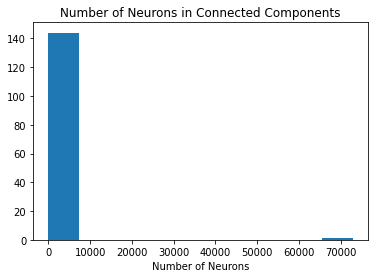

In [13]:
fig,ax = plt.subplots(1,1)
ax.hist(conn_comp_size)
ax.set_title("Number of Neurons in Connected Components")
ax.set_xlabel("Number of Neurons")
plt.show()

# Selecting the largest component

In [14]:
G_largest = G.subgraph(conn_comp[0])
node_names_largest_comp = np.array(G_largest.nodes())
node_names_largest_comp.shape

(72937,)

# Degree Distribution

In [16]:
undirectional_graph = nx.Graph(G_largest)
no_selflooped_graph = xu.remove_selfloops(undirectional_graph)
no_selflooped_graph

In [17]:
degree_distribution = np.array(xu.get_node_degree(no_selflooped_graph,node_names_largest_comp))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [32]:
print(f"Average Degree of Node: {np.mean(degree_distribution_filtered)}")
print(f"Median Degree of Node: {np.median(degree_distribution_filtered)}")

Average Degree of Node: 65.70743537452461
Median Degree of Node: 45.0


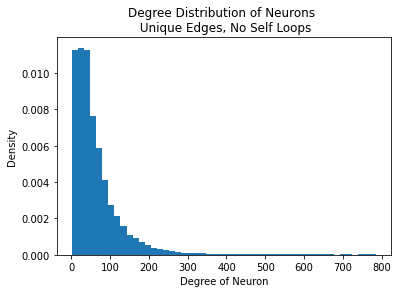

In [19]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=True)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Density")
plt.show()

# Degree Distribution In and Out

In [78]:
np.sum(degree_distribution(G,degree_type="in")),np.sum(degree_distribution(G,degree_type="out"))

(3546184, 3546184)

In [79]:
np.sum(degree_distribution(G,degree_type="in_and_out"))

7092368

In [105]:
import graph_analysis as ga
import graph_visualizations as gviz

In [108]:
from importlib import reload
gviz = reload(gviz)

In [123]:
in_degree = np.array(list(dict(G.in_degree()).values()))
in_degree

array([0, 8, 0, ..., 0, 1, 0])

<AxesSubplot:xlabel='Degree', ylabel='Count'>

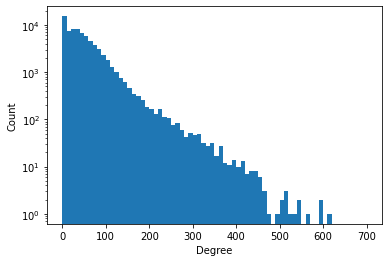

In [148]:
import matplotlib.pyplot as plt
import matplotlib_utils as mu

import numpy as np

mu.histogram(in_degree,bin_max = 700,
         bin_width = 10,return_fig_ax=True,logscale=True)

In [156]:
ga.degree_distribution(G,
                                                       degree_type="in",
                                                       percentile=95)

array([0, 8, 0, ..., 0, 1, 0])

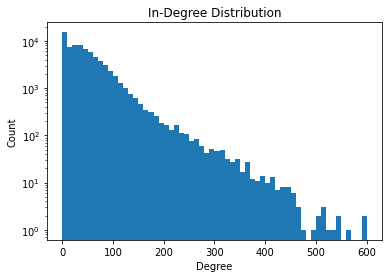

In [163]:
gviz.plot_degree_distribution(G,degree_type="in",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

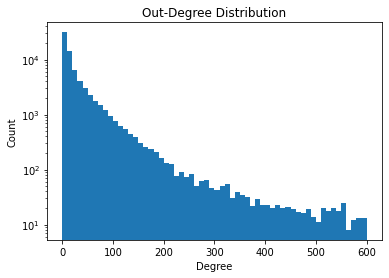

In [164]:
gviz.plot_degree_distribution(G,degree_type="out",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

bins = [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415.
 420. 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485.
 490. 495. 500. 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555.
 560. 565. 570. 575. 580. 585. 590. 595. 600. 605. 610. 615. 620. 625.
 630. 635. 640. 645. 650. 655. 660. 665. 670. 675. 680. 685. 690. 695.
 700. 705. 710. 715. 720. 725. 730. 735. 740. 745. 750. 755. 760. 765.
 770. 775. 780. 785. 790. 795. 800.]


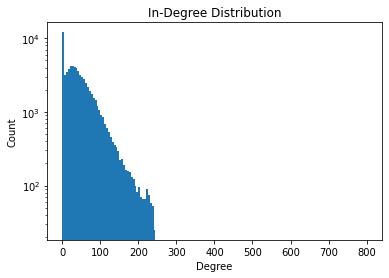

In [118]:
gviz.plot_degree_distribution(G,degree_type="in",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

bins = [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415.
 420. 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485.
 490. 495. 500. 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555.
 560. 565. 570. 575. 580. 585. 590. 595. 600. 605. 610. 615. 620. 625.
 630. 635. 640. 645. 650. 655. 660. 665. 670. 675. 680. 685. 690. 695.
 700. 705. 710. 715. 720. 725. 730. 735. 740. 745. 750. 755. 760. 765.
 770. 775. 780. 785. 790. 795. 800.]


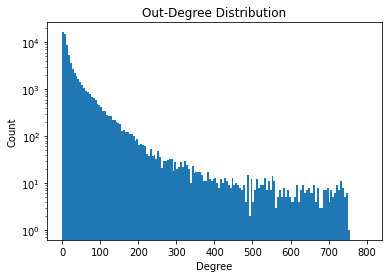

In [117]:
gviz.plot_degree_distribution(G,degree_type="out",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

bins = [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415.
 420. 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485.
 490. 495. 500.]


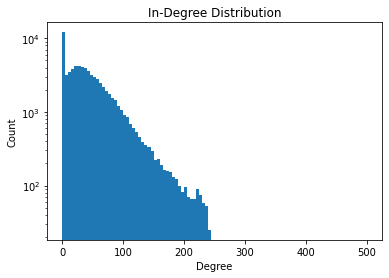

In [111]:
gviz.plot_degree_distribution(G,degree_type="in",title="In-Degree Distribution",
                         bin_width=5,
                         bin_max = 500,
                        percentile=99)

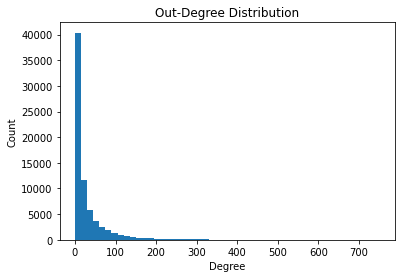

In [85]:
plot_degree_distribution(G,degree_type="out",title="Out-Degree Distribution",
                        percentile=99)

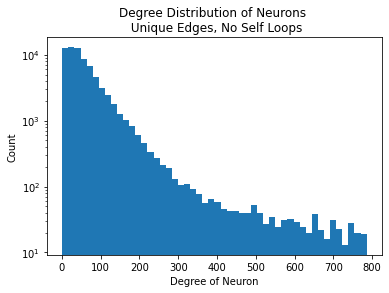

In [20]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=False)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Count")
ax.set_yscale("log")
plt.show()

# Getting the Soma to Soma Distance

In [37]:
"""
Psuedoode: Pull down the Nucleus IDs and Nucleus Centers

1) Get the nucleus ids and centers
2) Adjust the centers for nm


"""

nuc_table = du.configure_nucleus_table() & "segment_id>0"
nuc_table

ver materialization version,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,segment_id id of the segment under the nucleus centroid. Equivalent to Allen 'pt_root_id'.,"nucleus_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","nucleus_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","nucleus_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",supervoxel_id id of the supervoxel under the nucleus centroid. Equivalent to Allen: 'pt_supervoxel_id'.,volume volume of the nucleus in um^3
30.00,1998,864691136050815731,59936,105872,20078,72978435697419638,137.669
30.00,2198,864691135084884330,65088,104160,20059,73752285724957558,76.0236
30.00,2199,864691136521572241,65664,109488,19839,73823341596728836,142.404
30.00,2389,864691135494586958,58256,103152,20676,72766985934597733,50.0802
30.00,2398,864691136451074559,58720,109408,20589,72838179312529142,131.664
30.00,2433,864691135524436073,59968,109952,21002,73049354331530450,126.039
30.00,3024,864691135087399350,57024,103536,21200,72626248513279322,238.007
30.00,3117,864691134684964653,58512,105424,21317,72837629623886011,244.205
30.00,3121,864691132625568958,57648,103360,21760,72696617324576355,30.9133
30.00,3152,864691135524409705,58736,107008,21323,72837835782285934,47.1471


In [39]:
nucleu_ids,nuc_x,nuc_y,nuc_z = nuc_table.fetch("nucleus_id","nucleus_x","nucleus_y","nucleus_z")

In [41]:
nucleus_centers = np.vstack([nuc_x,nuc_y,nuc_z]).T * [4,4,40]
nucleus_centers

array([[ 239744,  423488,  803120],
       [ 260352,  416640,  802360],
       [ 262656,  437952,  793560],
       ...,
       [1642624, 1105152,  969400],
       [1654848, 1098752,  968760],
       [1658560, 1128960,  987640]])

In [51]:
nuc_id_to_center = dict([(k,v) for k,v in zip(nucleu_ids,nucleus_centers)])

In [ ]:
len(G_undirected_non_multi.edges())

In [44]:
print("hi")

hi


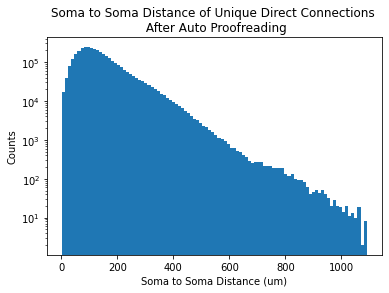

In [70]:
import matplotlib.pyplot as plt
def graph_to_soma_to_soma_distance(G):
    total_unique_edges = np.array(list(G.edges()))
    edges_mask = np.all(total_unique_edges>0,axis=1)
    soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
    soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)

    
    fig,ax = plt.subplots(1,1)
    ax.hist(soma_distances_norm/1000,bins=100,density=False)
    ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
    ax.set_xlabel("Soma to Soma Distance (um)")
    ax.set_ylabel("Counts")
    plt.yscale("log")
    plt.xscale("linear")
    plt.show()

graph_to_soma_to_soma_distance(G)

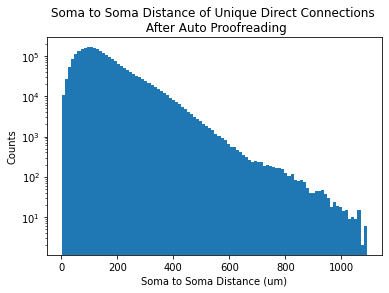

In [71]:
graph_to_soma_to_soma_distance(G_undirected_non_multi)

In [48]:
total_unique_edges = np.array(list(G_undirected_non_multi.edges()))


array([36774, 33721])

In [63]:
edges_mask = np.all(total_unique_edges>0,axis=1)
edges_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [64]:
soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
soma_distances

array([[[ 309632,  704640,  848960],
        [ 286080,  650752,  851160]],

       [[ 309632,  704640,  848960],
        [ 284864,  610560,  846920]],

       [[ 309632,  704640,  848960],
        [ 326848,  690944,  861080]],

       ...,

       [[1343360, 1142720,  952680],
        [1339776, 1144384,  953120]],

       [[1074368, 1142848,  968760],
        [1055488, 1143104,  941080]],

       [[1289536, 1026176,  698560],
        [1280576, 1027072,  698120]]])

In [65]:
soma_distances.shape

(2588087, 2, 3)

In [67]:
soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)
soma_distances_norm.shape

(2588087,)

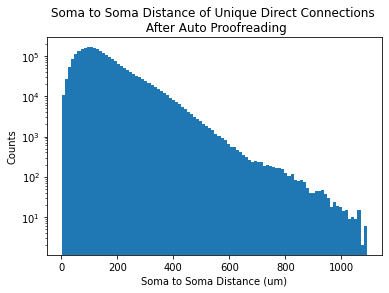

In [69]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(soma_distances_norm/1000,bins=100,density=False)
ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")
plt.yscale("log")
plt.xscale("linear")
plt.show()

In [ ]:
alpha_level = 0.7

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(total_distances_no_self_loops/1000,bins=100,density=False,color="blue",label="Before Auto Proofreading",alpha=alpha_level)
ax.hist(total_distances_no_self_loops_auto/1000,bins=100,density=False,color="red",label="After Auto Proofreading",alpha=alpha_level)
ax.set_title("Soma to Soma Distance of Direct Connections")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")

ax.set_yscale("log")
ax.set_xscale("linear")
ax.legend()
plt.show()